<h1>Закономерности, опредлеяющие успешность игры. </h1>

**На основании данных из открытых источников  за 2016 год (о продажах игр, оценки пользователей и экспертов, жанры и платформы, например, Xbox или PlayStation), мы вявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**


# Оглавление
1. [Извление файлов и общий обзор данных](#1)
2. [Предобработка данных](#2)
3. [Предобработка данных: замена типов данных и наименований столбцов](#3)
4. [Исследовательский анализ данных](#4)
5. [Портрет пользователя каждого региона](#5)
5.1. [Портрет игрока из стран Северной Америки](#6)
5.2. [Портрет игрока из стран Евросоюза](#7)
5.3. [Портрет игрока из Японии](#8)
6. [Проверка гипотез](#9)
7. [Общие выводы](#10)
    

<a id="1"></a>

<h2>Извление файлов и общий обзор данных</h2>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st # для гипотез
import numpy as np
import math as math
import matplotlib.ticker as ticker # для вспомогательной сетки и дополнеительных делений

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.duplicated().sum()

0

In [6]:
for col in df.columns:
    pct_missed = np.mean(df[col].isnull()) # np.mean вычисляет долю числа пропусков в ячейке от общего числа значений в столбце
    print('{}: {} missed ({}%)'.format(col, df[col].isnull().sum(), round(pct_missed*100, 2)))

Name: 2 missed (0.01%)
Platform: 0 missed (0.0%)
Year_of_Release: 269 missed (1.61%)
Genre: 2 missed (0.01%)
NA_sales: 0 missed (0.0%)
EU_sales: 0 missed (0.0%)
JP_sales: 0 missed (0.0%)
Other_sales: 0 missed (0.0%)
Critic_Score: 8578 missed (51.32%)
User_Score: 6701 missed (40.09%)
Rating: 6766 missed (40.48%)


In [7]:
df.isnull().sum().sum()

22318

При первичном обзоре полученных данных мы видим, что названия столбцов необходимо привести к единому регистру, заменить типы данных, обработать 22318 пропусков. А также находим целесообразным посчитать суммарные продажи и записать их в отдельный столбец.


<a name="2"></a>

<h2>Предобработка данных: частичная обработка пропусков</h2>

В первую очередь, приведем названия столбцов к нижнему регистру.

In [8]:
df.columns = map(str.lower, df.columns) # приведение к нижнему регистру каждого названия столбца
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Перед тем как заменять типы данных, **необходимо принять решение о корректной замене пропусков**. К пропускам могло привести слияние с другими таблицами, либо недостаточное наличие данных изначально.<br>
Так как основной вопрос исследования касается успешности реализации и популярности игры, отраженной напрямую в сумме кассовых соборов, то **рейтинги игр несет второстепенное значение в исследовании**. Значение рейтинга игры, с одной стороны, является обосбленным независимым значением от рейтинга других игр, с другой - **рейтинг игры является относительно зависимым значением**: на оценку определнной игры оказывает влияние прошлый опыт игрока и текущий успех других игр, исходя из чего игрок оценивает текущую игру. <br>
    При визульном изучении таблицы, мы обнаружили взаимосвязь между отсутсвующими значениями в трёх слобцах (рейтинги критиков, игроков и возрастная категория): в подавляющем большинстве случаев, значения отсутвуют во всех трех колонках сразу. <br>
- **рейтинг критиков** - (достигает 51%) - по возможности, частично восстановим значения при помощи расчета значения на основе рейтинга игроков в соседнем столбце, так как рейтинги практичекски всегда коррелируют. 
- **рейтинг игроков** (40%) - аналогично рассчитаем значение на основе соседнего столбца в обратную сторону.
- **классификации по возрасту** (40%) - возможно позже при необходимости восполним эту классификацию путем подстановки категории из других таких же игр по ключевым словам.
- **наименование игры** - два наименования пропущено. Предлагаем заменить на game, так как истинное значение игры не так важно;
- **наименование жанра** - два значения пропущено. Можно удалить - 0.01 % значений не жалко либо подставить прямой подстановкой; 
- **год выпуска** - 269 пропусков (2%) - подставлять года выпуска игр будет затратно по времени, и вероятно, это не будет иметь значения, за исключением случая, если бдудет принято решение рассматривать только последние популярные тенденции в играх, то необходимо будет определеить и отделить старые игры. Предлагаем заменить медианным значением, так как обычно в системе рейтинга лидеры выбиваются вперед, а рейтинг прямого влияния на кассовые сборы не имеет.

Таким образом данные удасться восстановить у 900 игр.

При изучении таблицы, мы выявили корреляцию между оценками критиков и игроков примерно 1 к 10 (кратность, если поделить оценку критиков на 10, то мы получим рейтинг игроков).

Избавимся от пустых значений в **user_score** на основе данных **critic_score**,так как столбцы визуально коррелируют, что даст всего лишь **+38 значений**, так как отсутсвуют значения одновременно в обоих колонках. Подтвердить корреляцию методом .corr() пока не уджается, так user_score имеет тип строки.

In [9]:
df.loc[df.user_score.isnull(), 'user_score'] = round(df.critic_score / 10, 1) # +38 non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10052 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Аббревиатура **tbd** (*to be determined*) - значение должно быть определено, в столбце **user_score** встречается 2424 раза (14,5%), видимо, ожидалась оценка игроков.

In [10]:
df[df['user_score'] == 'tbd'].head(5)
# TODO как безоапсно убрать tbd так чтобы не заменить это значение на nan критик_скор

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


 Значение **tbd** предлагаем рассматривать как отсутсвующие значение **NaN** и заменить его на основе рейтинга критиков, так как значение коррелируют. При помощи объявленной ниже функции и метода .apply() нам удасться восстановиться 1100 значений вместо tbd. 

In [11]:
def from_critic_to_users(row): # дает + 0 non-null и + 1100 не tbd
    s = str(row['user_score'])      # преобразовываем значение user_score в строку
    critic_s = str(row['critic_score'])
    if s == 'tbd' and critic_s != 'nan': # TODO заменил только полвину tbd (плохо) и nan не прибавилось (хорошо)
        return round(row['critic_score'] / 10, 1) # рейтинг критиков делим на 10, округляем до 1 цифры, записываем users_score 
    #if s != 'tbd':                  # смотрим не равна ли строка nan или tbd
        #return row['user_score']    # если не равна - возвращаем значение обратно
    else: 
        return row['user_score']

    
df['user_score'] = df.apply(from_critic_to_users, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10052 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
len(df[df['user_score'] == 'tbd'])

1342

Отслось 1342 tbd, которые рассчитать на основе данных стаолбца critic_score не удается. **Оставшиеся значения tbd заменим на nan**, чтобы затем успешно поменять тип данных.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
len(df[df['user_score'] == 'tbd'])

0

Отсутсвующие **значения года выпуска игры (1,61%) заменим на медиану**, если нам не очень важен год выпуска.

In [14]:
df.loc[df['year_of_release'].isnull(), 'year_of_release'] = df['year_of_release'].median()
df.year_of_release.isnull().sum()

0

Отсутсвующие **2 названия игр заменим на game**.

In [15]:
df.loc[df['name'].isnull(), 'name'] = 'game'
df.name.isnull().sum()

0

<a name="3"></a>

<h2>Предобработка данных: замена типов данных и наименований столбцов</h2>

В наборе данных попадается аббревиатура **ESRB** (*Entertainment Software Rating Board*) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». В таблице данные о ранжировании по возрасту содержатся в столбце **raiting**, для устранения двусмысленности, данный столбец необходимо будет переименовать в название, отражающее возрастную катеогорию - **age**.

Переименуенм столбец raiting в age.

In [16]:
df.rename(columns = {'rating':'age'}, inplace = True)
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


**Заменим типы данных:** 
* **year_of_release** - год не может быть дробным числом - заменим на целочисленный тип int64; 
* **user_score** - рейтинг пользователей должен быть дробным числом, а не строкой - заменим на дробный тип данных float64;
* **critic_score** - рейтинг пользователей должен быть дробным числом, а не строкой - заменим на дробный тип данных float64.

In [17]:
df = df.astype({'year_of_release': 'int',
           'user_score': 'float',
          'critic_score': 'float'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         8710 non-null float64
age                9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


А также находим целесообразным **посчитать суммарные продажи** и записать их в отдельный столбец, так кассовые сборы являютсмя основным показателем успешности игры для разработчиков и маркетологов.

In [19]:
df['total_profit'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age,total_profit
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a name="4"></a>

<h2>Исследовательский анализ данных</h2>

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [20]:
# by_years = df.pivot_table(index='year_of_release', values='', aggfunc=['sum', 'count'])
by_years = df.groupby('year_of_release').sum()
by_years['counter_games'] = df.pivot_table(index='year_of_release', values='name', aggfunc='count') # посчитать игры по годам и приклеить к нижней таблице колво игр
by_years

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_profit,counter_games
year_of_release,,,,,,,,
1980,10.59,0.67,0.00,0.12,0.0,0.0,11.38,9
1981,33.40,1.96,0.00,0.32,0.0,0.0,35.68,46
1982,26.92,1.65,0.00,0.31,0.0,0.0,28.88,36
1983,7.76,0.80,8.10,0.14,0.0,0.0,16.80,17
1984,33.28,2.10,14.27,0.70,0.0,0.0,50.35,14
1985,33.73,4.74,14.56,0.92,59.0,5.8,53.95,14
1986,12.50,2.84,19.81,1.93,0.0,0.0,37.08,21
1987,8.46,1.41,11.63,0.20,0.0,0.0,21.70,16
1988,23.87,6.59,15.76,0.99,64.0,2.2,47.21,15


Уйстойчивой тенденции к росту прибыли до 1994 года не наблюдалось. **Рейтинги игроков стабильно начали учитывать с 1996 года**, до этого, оценки мнений игроков и исследователей не систематизировались. **Бурное развитие игровой индустрии наблюдается с 1994 по 2007 год**, после чего идет умеренный спад. **С 2007 по 2009 года в течение трех лет наблюдается перенасыщение рынка**, однако возникший мировой кризис 2008 года поспособствует снижению выручки, и **при сохраняющихся темпах производства новых игр, 2008 и 2009 год будут приносить меньше прибыли**, что затем вызовет  постепенное снижение объемов выпуска новых игр вплоть до 2010 года. 2010 год ознаменован распространением смартфонов, что также заберет часть рынка игр на себя. **После совокупности данных событий, объемы производства игр сохранятся на уровне 2012 года при продолжении снижения выручки, что говорит о продолжающимся перенасыщении рынка**, либо о предпочтении игроков к более старым форматам игр, либо отсутсвию оригинальных идей у разработчиков, либо отсутствие учета предпочтений игроков при разработке, либо успехом такой новинки как смартфон.

Таким образом **период с 1994 года по 2008 год можно считать самым успешным** в производстве игр, а **с 2012 года формируется новый рынок** с усточивым объемом производства игр.

Изучим изменения продаж по игровым платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определеим, за какой характерный срок появляются новые и исчезают старые платформы.

In [21]:
by_platforms = df.groupby('platform').sum()
by_platforms['counter_games_by_platforms'] = df.pivot_table(index='platform', values='name', aggfunc='count') # посчитать игры по годам и приклеить к нижней таблице колво игр

top_10_platforms = by_platforms.sort_values(by='total_profit', ascending=False).head(10)
top_10_platforms = top_10_platforms[['total_profit', 'counter_games_by_platforms', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']]
top_10_platforms


,total_profit,counter_games_by_platforms,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
platform,,,,,,,,
PS2,1255.77,2161,583.84,339.29,139.20,193.44,89208.0,10315.3
X360,971.42,1262,602.47,270.76,12.43,85.76,62853.0,6659.6
PS3,939.65,1331,393.49,330.29,80.19,135.68,57714.0,6076.0
Wii,907.51,1320,496.90,262.21,69.33,79.07,36752.0,4287.0
DS,806.12,2151,382.40,188.89,175.57,59.26,45717.0,5074.7
PS,730.86,1197,336.52,213.61,139.82,40.91,14303.0,1548.1
GBA,317.85,822,187.54,75.25,47.33,7.73,29509.0,3209.5
PS4,314.14,392,108.74,141.09,15.96,48.35,18167.0,1754.9
PSP,294.05,1209,109.17,66.68,76.78,41.42,31150.0,3457.1


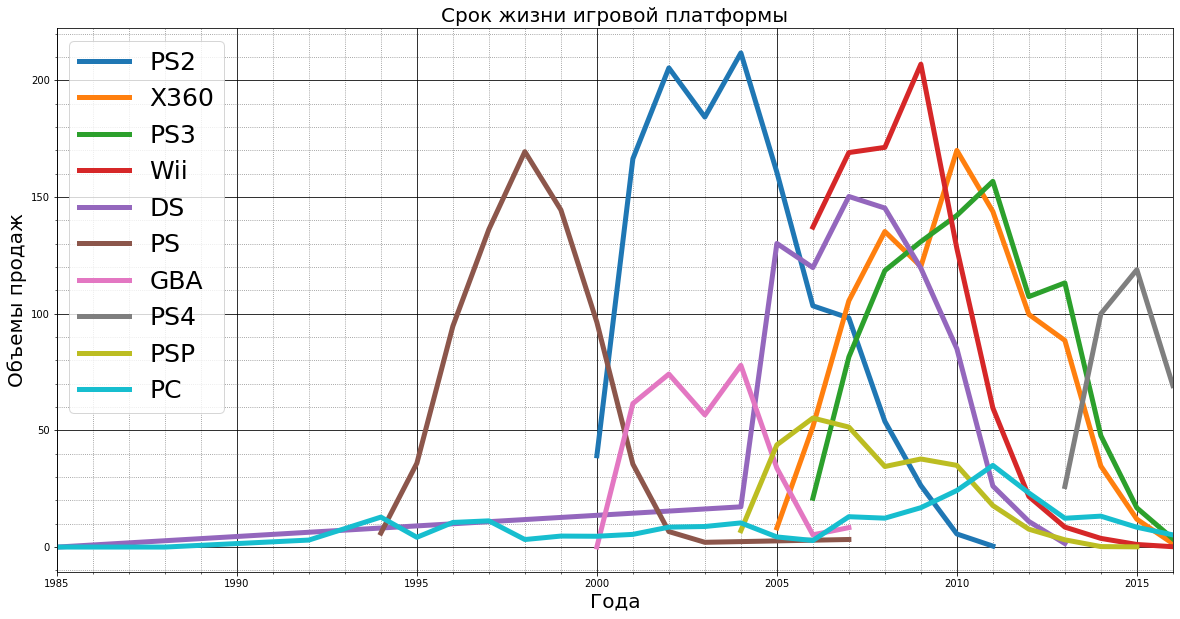

In [22]:
PS2_by_year = df[df['platform'] == 'PS2'].groupby(['year_of_release'])['total_profit'].agg('sum')
PS2_by_year = pd.DataFrame(PS2_by_year)
PS2_by_year = PS2_by_year.rename(columns={'total_profit': 'PS2'})

X360_by_year = df[df['platform'] == 'X360'].groupby(['year_of_release'])['total_profit'].agg('sum')
X360_by_year = pd.DataFrame(X360_by_year)
X360_by_year = X360_by_year.rename(columns={'total_profit': 'X360'})

PS3_by_year = df[df['platform'] == 'PS3'].groupby(['year_of_release'])['total_profit'].agg('sum')
PS3_by_year = pd.DataFrame(PS3_by_year)
PS3_by_year = PS3_by_year.rename(columns={'total_profit': 'PS3'})

Wii_by_year = df[df['platform'] == 'Wii'].groupby(['year_of_release'])['total_profit'].agg('sum')
Wii_by_year = pd.DataFrame(Wii_by_year)
Wii_by_year = Wii_by_year.rename(columns={'total_profit': 'Wii'})

DS_by_year = df[df['platform'] == 'DS'].groupby(['year_of_release'])['total_profit'].agg('sum')
DS_by_year = pd.DataFrame(DS_by_year)
DS_by_year = DS_by_year.rename(columns={'total_profit': 'DS'})

PS_by_year = df[df['platform'] == 'PS'].groupby(['year_of_release'])['total_profit'].agg('sum')
PS_by_year = pd.DataFrame(PS_by_year)
PS_by_year = PS_by_year.rename(columns={'total_profit': 'PS'})

GBA_by_year = df[df['platform'] == 'GBA'].groupby(['year_of_release'])['total_profit'].agg('sum')
GBA_by_year = pd.DataFrame(GBA_by_year)
GBA_by_year = GBA_by_year.rename(columns={'total_profit': 'GBA'})

PS4_by_year = df[df['platform'] == 'PS4'].groupby(['year_of_release'])['total_profit'].agg('sum')
PS4_by_year = pd.DataFrame(PS4_by_year)
PS4_by_year = PS4_by_year.rename(columns={'total_profit': 'PS4'})

PSP_by_year = df[df['platform'] == 'PSP'].groupby(['year_of_release'])['total_profit'].agg('sum')
PSP_by_year = pd.DataFrame(PSP_by_year)
PSP_by_year = PSP_by_year.rename(columns={'total_profit': 'PSP'})

PC_by_year = df[df['platform'] == 'PC'].groupby(['year_of_release'])['total_profit'].agg('sum')
PC_by_year = pd.DataFrame(PC_by_year)
PC_by_year = PC_by_year.rename(columns={'total_profit': 'PC'})


scenarios = [PS2_by_year, X360_by_year, PS3_by_year, Wii_by_year, DS_by_year, PS_by_year, GBA_by_year, PS4_by_year, PSP_by_year, PC_by_year]
fig, ax = plt.subplots()


for m in scenarios:
    m.plot(ax=ax, figsize=(20, 10), grid=True, linewidth=5,) #  marker='o', 
    
#  Устанавливаем интервал основных и вспомогательных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))


#  Добавляем линии основной сетки:
ax.grid(which='major',
        color = 'k')

#  Включаем видимость вспомогательных делений:
ax.minorticks_on()
#  Теперь можем отдельно задавать внешний вид вспомогательной сетки:
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.legend(loc=2, prop={'size': 25}) #  устновить размер легенды и ее положение (2 - верхний левый угол)
plt.ylabel('Объемы продаж', fontsize=20)
plt.xlabel('Года', fontsize=20)
plt.title('Срок жизни игровой платформы', fontsize=20)

plt.show()


На полученном графике, мы видим, что средний жизненный цикл игровой платформы составляет 5-10 лет. 
Лидерами по побъем выпущенных игр, для этих приставок являлись PS2, X360, PS3.
На данный момент, все из них находятся в упадке по объемам выпускаемых игр для этих платформ, что объясняется развитием онлайн игр и смартфонов, которые заменяют приставки.
Сравнительно большее количество игр на конец исследуемого периода выпускается для PS4, PS3, X360 и PC.

После 2012 года на всем рынкуе игровых платформ наступил негативный период, которые ознаменован небольшими объемами продаж, с началом развития совеременных смартфонов - ознаменован новый период развития. Возьмём данные за соответствующий актуальный период с 2012 года. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [23]:
#PS2_by_year


PS2_by_year = PS2_by_year.reset_index()
PS2_by_year = PS2_by_year[PS2_by_year['year_of_release'] > 2005]
PS2_by_year = PS2_by_year.set_index('year_of_release')
PS2_by_year.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2006 to 2011
Data columns (total 1 columns):
PS2    6 non-null float64
dtypes: float64(1)
memory usage: 96.0 bytes


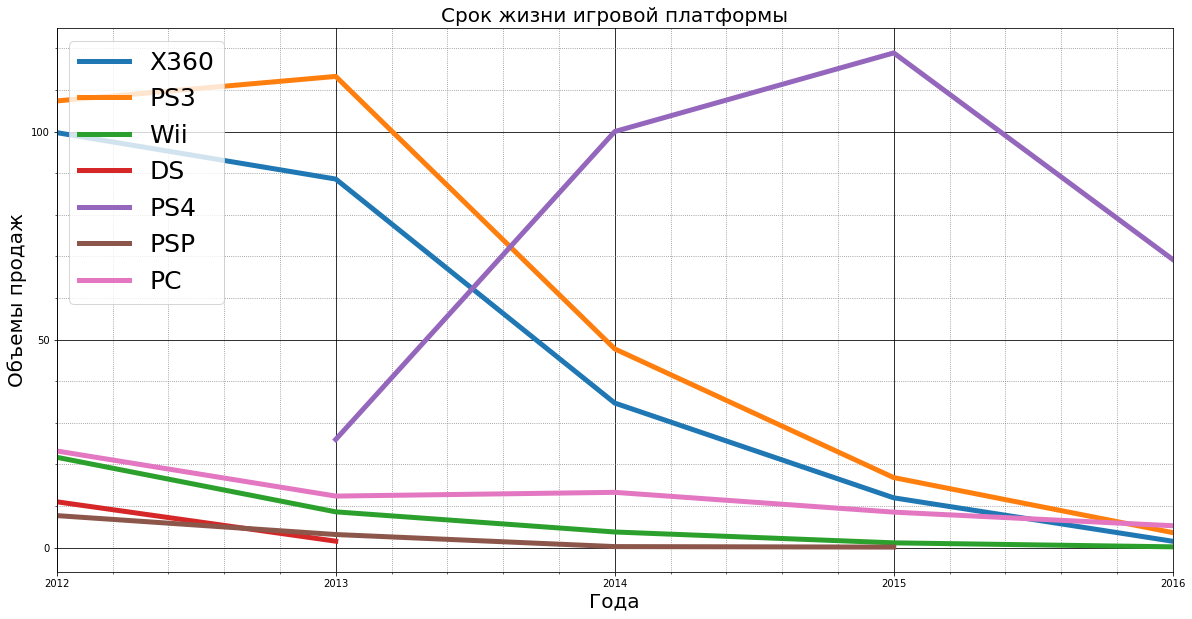

In [24]:
#PS2_by_year = PS2_by_year.reset_index()
#PS2_by_year = PS2_by_year[PS2_by_year['year_of_release'] >= 2010]
#PS2_by_year = PS2_by_year.set_index('year_of_release')

X360_by_year = X360_by_year.reset_index()
X360_by_year = X360_by_year[X360_by_year['year_of_release'] > 2011]
X360_by_year = X360_by_year.set_index('year_of_release')

PS3_by_year = PS3_by_year.reset_index()
PS3_by_year = PS3_by_year[PS3_by_year['year_of_release'] > 2011]
PS3_by_year = PS3_by_year.set_index('year_of_release')

Wii_by_year = Wii_by_year.reset_index()
Wii_by_year = Wii_by_year[Wii_by_year['year_of_release'] > 2011]
Wii_by_year = Wii_by_year.set_index('year_of_release')

DS_by_year = DS_by_year.reset_index()
DS_by_year = DS_by_year[DS_by_year['year_of_release'] > 2011]
DS_by_year = DS_by_year.set_index('year_of_release')

#PS_by_year = PS_by_year.reset_index()
#PS_by_year = PS_by_year[PS_by_year['year_of_release'] >= 2008]
#PS_by_year = PS_by_year.set_index('year_of_release')

#GBA_by_year = GBA_by_year.reset_index()
#GBA_by_year = GBA_by_year[GBA_by_year['year_of_release'] >= 2008]
#GBA_by_year = GBA_by_year.set_index('year_of_release')

PS4_by_year = PS4_by_year.reset_index()
PS4_by_year = PS4_by_year[PS4_by_year['year_of_release'] > 2011]
PS4_by_year = PS4_by_year.set_index('year_of_release')

PSP_by_year = PSP_by_year.reset_index()
PSP_by_year = PSP_by_year[PSP_by_year['year_of_release'] > 2011]
PSP_by_year = PSP_by_year.set_index('year_of_release')

PC_by_year = PC_by_year.reset_index()
PC_by_year = PC_by_year[PC_by_year['year_of_release'] > 2011]
PC_by_year = PC_by_year.set_index('year_of_release')


scenarios = [X360_by_year, PS3_by_year, Wii_by_year, DS_by_year, PS4_by_year, PSP_by_year, PC_by_year]
fig, ax = plt.subplots()

for m in scenarios:
    m.plot(ax=ax, figsize=(20, 10), grid=True, linewidth=5,) #  marker='o', 
    
#  Устанавливаем интервал основных и вспомогательных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # каждый 1
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))


#  Добавляем линии основной сетки:
ax.grid(which='major',
        color = 'k')

#  Включаем видимость вспомогательных делений:
ax.minorticks_on()
#  Теперь можем отдельно задавать внешний вид вспомогательной сетки:
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')

plt.legend(loc=2, prop={'size': 25}) #  устновить размер легенды и ее положение (2 - верхний левый угол)
plt.ylabel('Объемы продаж', fontsize=20)
plt.xlabel('Года', fontsize=20)
plt.title('Срок жизни игровой платформы', fontsize=20)

plt.show()


PS PS2  и GBA прекратили свое существоание после 2012 года. Единственными продолжающими существоать из гигантов игрового рынка на конец 2015 года X360, PS3, PS4, PC, Wii.
Единственный фаворит игрового рынка, в отличие от мобильных устройств и компьютеров остается PS4, однако его популярность также идет на снижение.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


In [25]:
platforms_profit = df.groupby(['platform'])['total_profit'].sum()
platforms_profit = pd.DataFrame(platforms_profit)
platforms_profit

,total_profit
platform,
2600,96.98
3DO,0.10
3DS,259.00
DC,15.95
DS,806.12
GB,255.46
GBA,317.85
GC,198.93
GEN,30.77


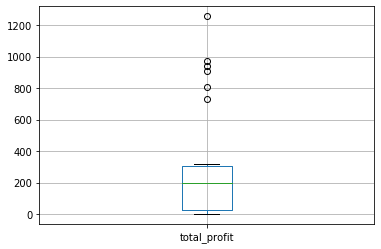

In [26]:
platforms_profit.boxplot('total_profit')

На полученном распределннии мы видим, что в среднем игровые платформы за всю свою историю существоания получили прибыль от 50 до 300, медианное значение 200. Однако, по выбросам мы видим, что прибыль у шести платформ достигает и 700-1300.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для начала вспомним, какая платформа была ниболее популярной за историю, и составим выборку игры для этой плдатформы.

Ранее мы выяснили, что несмотря на то, что самой популярной на рынке игровых платформ за всю истрорию была платформа PS2, однако производство игр для этой платформы уже прекращено. Текущим лидером на 2016 год остается платфрма X360, хоть и выпущенно для нее в два раза меньше игр.

In [27]:
X360_platform = df[df['platform'] == 'X360'] # Выберем игры, выпущенные для платформы PS2.
X360_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age,total_profit
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16622,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01


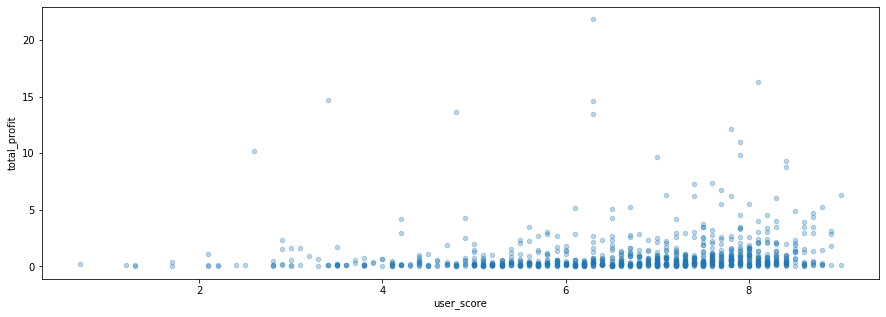

In [28]:
X360_platform.plot(x='user_score', y='total_profit', kind='scatter', alpha=0.3, figsize=(15, 5))

Для игр, выпущенных для платформы X360, положиетльные отзывы имеют незначительное влияние на продажи. Один и тот же размер прибыли могут приносить игры и с небольшим рейтингом и с высоким. Наблюдается достаточно слабая корреляция размера прибыли от рейтинга игры у пользователей.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [29]:
genre_profit = df.groupby(['genre'])['total_profit'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='total_profit', ascending=False)

,total_profit
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


Наиболее прибыльными жанрами являются Action, Sports, Shooter, а наименее прибыльными - Puzzle, Adventure, Strategy.

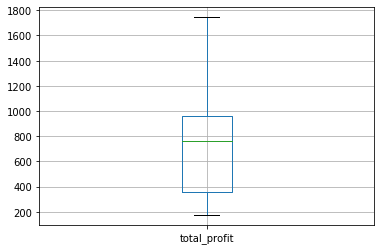

In [30]:
genre_profit.boxplot('total_profit')

На распределении мы видим, что выборосов прибыли при группировке по жанрам не блюдается. Средний диапазон прибыли от 350 до 950. Медианное значение 750.

<a name="5"></a>

<h2>Портрет пользователя каждого региона</h2>

<a name="6"></a>

<h3>Портрет игрока из стран Северной Америки</h3>

Определим портрет для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [31]:
na_platform = df.groupby(['platform'])['na_sales'].sum()
na_platform = pd.DataFrame(na_platform)
na_platform.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


В США и Канаде наиболее популярной игровой платформой является X360, а также популярны PS2, Wii, PS3, DS.

In [32]:
genre_profit = df.groupby(['genre'])['na_sales'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


Наиболее популярные жанры в странах Северной Америки - Action Sport, Shooter.

In [33]:
genre_profit = df.groupby(['age'])['na_sales'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
age,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56


Наиболее продаваемые из возрастной категории Е - (everyone - для всех: от 6 лет и старше), такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

<a name="7"></a>

<h3>Портрет игрока из стран Евросоюза</h3>

In [34]:
na_platform = df.groupby(['platform'])['eu_sales'].sum()
na_platform = pd.DataFrame(na_platform)
na_platform.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


В странах Евросоюза картина практически идентична: наиболее популярной игровой платформой является PS2, а также популярны PS3, Wii, PS3, X360, DS.

In [35]:
genre_profit = df.groupby(['genre'])['eu_sales'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


Интересы в Европе схожи с американскими: популярны Action, Sports, Shooter, а также еще Racing.

In [36]:
genre_profit = df.groupby(['age'])['eu_sales'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
age,
E,710.25
M,483.97
T,427.03
E10+,188.52
AO,0.61


В странах Европы также больше продаются игры, категории для всех.

<h3>Портрет игрока из Японии</h3>

In [37]:
na_platform = df.groupby(['platform'])['jp_sales'].sum()
na_platform = pd.DataFrame(na_platform)
na_platform.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


В Японии лидером среди игроков является DS, старые версии PlayStation PS и PS2, а также получают распространение дргуие игровые платформы: SNES, 3DS. 

In [38]:
genre_profit = df.groupby(['genre'])['jp_sales'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


В Японии, в отличие от Европы и Америки, наиболее популярный жанр Role-Playing (традиционные настольные игры), вероятно потому что, Япония является родиной многих настольных интеллектуальных игр, и там сильны традиции и другая культура. Отсутсвие жанра Shooter в лидерах - тому подтверждение.

In [39]:
genre_profit = df.groupby(['age'])['jp_sales'].sum()
genre_profit = pd.DataFrame(genre_profit)
genre_profit.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
age,
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46


В Японии также предпочитают игры для всех.

X360 наиболее продолжительный успех имеет у себя на родине в США, наиболее распростаненной по всему миру является более новая или более старая версия платформы PlayStation - PS, PS2, PS3. в Японии на равне с PlayStation имеют успех местные платформы - DS, SNES, 3DS.

В Японии, в отличие от Европы и Америки, наиболее популярный жанр Role-Playing (традиционные настольные игры), вероятно потому что, Япония является родиной многих настольных интеллектуальных игр, и там сильны традиции и другая культура. Отсутсвие жанра Shooter в лидерах - тому подтверждение.

Возрастная категория на продажи не влияет, но но по всему миру большее предпочтение отдают играм из категории E - для всех.

<a name="9"></a>

<h2>Проверка гипотез</h2>


Проверим две гипотезы. Первая нулевая гипотеза: **средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**

Для того чтобы подтвердить или опровергнуть гипотезу статистическими методами программным способом: суммируем пользовтаельский рейтинг для каждой игровой платформы на основе отдельной таблицы, затем разделим полученное число на на длину этой таблицы за вычетом позиций nan в столбце пользовательского рейтинга. **Для проверки используем t-критерий Стьюдента потому что выборки являются независимыми, корреляции отсутсвуют.**

In [73]:
xbox_series = X360_platform['user_score'].dropna()
# среднее значение рейтинга на PC xbox = 6.65

pc_series = pc_platform['user_score'].dropna()
# среднее значение рейтинга на PC = 7.06

alpha = 0.05

results = st.ttest_ind(pc_series, xbox_series)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, т.е. значения не равны, превышен критический порог 0,05")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.3628202997665105e-09
Отвергаем нулевую гипотезу, т.е. значения не равны, превышен критический порог 0,05


Пользовательские рейтинги игры X360 и PC отличаются. Игрокам игры на PC нравятся больше.

Вторая альтернативная гипотеза: **средние пользовательские рейтинги жанров Action и Sports разные.**

In [75]:
action = df[df['genre'] == 'Action']
action_series = action['user_score'].dropna()
# среднее значение рейтинга жанра Action = 6.91

# высчитаем средний пользовательский рейтинг для Sports таким же образом
sports = df[df['genre'] == 'Sports']
sports_series = sports['user_score'].dropna()
# среднее значение рейтинга жанра Sports = 6.84

alpha = 0.05

results = st.ttest_ind(action_series, sports_series)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, т.е. значения не равны, превышен критический порог 0,05")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  0.17388180480082055
Не получилось отвергнуть нулевую гипотезу


Значения рейтингов Action и Sports практически равны.

<a name="10"></a>

<h1>Общий вывод</h1>

В ходе проведенного анализа, мы определеили факторы, определяющие успешность игры на рынке. Пользовательские рейтинги игры X360 и PC отличаются. Игрокам игры на PC нравятся больше. Но, если не учитывать игры для компьютера, наиболее популярной игровой платформой на данный момент осталась платформа Х360. Наиболее популярным игрой по всему миру независимо от региона являются игры без возрастных ограничений (Е - от 6 лет, для всех), зачастую это игры с мультяшной анимацией. Если планировать рекламную кампанию в странах северной Америки и Европы, то следует сдлелать упор на игры жанров Action, Sports, Shooter. Если реализовавывать игру в Японии, то там популярны жанры, имитирующие настольные игры Role-Playing, а также Action и Sports.